In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In [ ]:
crimen = pd.read_csv("../Consultas/cubo_crimen_CDMX.csv")
aire = pd.read_csv("../Consultas/cubo_aire_CDMX.csv")

aire_sin = pd.read_csv("../CSV_limpios/aire.csv")
crimen_sin = pd.read_csv("../CSV_limpios/crimen.csv")

crimen_o3 = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
aire_o3 = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

In [3]:
crimen_new

,Unnamed: 0,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,countCrimenes
0,0,1_1_2016_ALVAR,1,1,2016,ALVARO OBREGON,19.325146,-99.204140,5
1,1,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,4
2,2,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,4
3,3,1_1_2016_COYOA,1,1,2016,COYOACAN,19.304441,-99.103630,6
4,4,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,5
...,...,...,...,...,...,...,...,...,...
22438,22438,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15
22439,22439,31_12_2020_MIGUE,31,12,2020,MIGUEL HIDALGO,19.404051,-99.202660,3
22440,22440,31_12_2020_TLAHU,31,12,2020,TLAHUAC,19.246458,-99.010567,3
22441,22441,31_12_2020_TLALP,31,12,2020,TLALPAN,19.154285,-99.162613,4


In [4]:
df_crimen

,Unnamed: 0,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,countCrimenes
0,1,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,7
1,2,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7
2,4,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10
3,5,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12
4,7,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12
...,...,...,...,...,...,...,...,...,...
15076,27941,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2
15077,27943,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.365313,-99.291702,2
15078,27945,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24
15079,27947,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15


In [5]:
df_all = pd.DataFrame()

In [6]:
df_all['ID'] = df_aire['ID']
df_all['Dia'] = df_aire['Dia']
df_all['Mes'] = df_aire['Mes']
df_all['Anio'] = df_aire['Anio']
df_all['Alcaldia'] = df_aire['Alcaldia']
df_all['Latitud'] = df_aire['Latitud']
df_all['Longitud'] = df_aire['Longitud']
df_all['Crimenes'] = df_crimen['countCrimenes']
df_all['AQI'] = df_aire['avgAQI']
df_all

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,7,206
1,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184
2,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164
3,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178
4,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187
...,...,...,...,...,...,...,...,...,...
15076,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117
15077,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97
15078,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128
15079,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127


In [25]:
#Para los plots

df_aire_2 = df_all[(df_all['Anio'] == 2019) & (df_all['Alcaldia'] == 'IZTAPALAPA') & (df_all['AQI'] > 10)]

df_aire_2 = df_aire_2.reset_index(drop=True)
df_aire_2

#df_aire_2.reset_index().iloc[:, 2:]

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2019_IZTAP,1,1,2019,IZTAPALAPA,19.360794,-99.073883,52,176
1,2_1_2019_IZTAP,2,1,2019,IZTAPALAPA,19.360794,-99.073883,72,153
2,3_1_2019_IZTAP,3,1,2019,IZTAPALAPA,19.360794,-99.073883,56,135
3,4_1_2019_IZTAP,4,1,2019,IZTAPALAPA,19.360794,-99.073883,82,131
4,5_1_2019_IZTAP,5,1,2019,IZTAPALAPA,19.360794,-99.073883,76,159
...,...,...,...,...,...,...,...,...,...
277,26_12_2019_IZTAP,26,12,2019,IZTAPALAPA,19.360794,-99.073883,46,140
278,28_12_2019_IZTAP,28,12,2019,IZTAPALAPA,19.360794,-99.073883,44,122
279,29_12_2019_IZTAP,29,12,2019,IZTAPALAPA,19.360794,-99.073883,40,103
280,30_12_2019_IZTAP,30,12,2019,IZTAPALAPA,19.360794,-99.073883,44,96


In [26]:
df_aire_2[:].loc[(df_aire_2['ID'] == "31_12_2019_IZTAP")]

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
281,31_12_2019_IZTAP,31,12,2019,IZTAPALAPA,19.360794,-99.073883,38,114


In [27]:
#df_aire_2 = df_all[(df_all['Anio'] == 2019) & (df_all['AQI'] > 10)]

df_all_fit = np.polyfit(df_aire_2.AQI, df_aire_2.Crimenes, 1)
slope = df_all_fit[0]

print(slope)

percentage = (slope*1000)/df_aire_2["Crimenes"].max()

print(df_aire_2["Crimenes"].max())

print("For every 10 units increases in AQI, the predicted value of Crime increases by {:.5f} %.".format(percentage))


0.06331384216871588
98
For every 10 units increases in AQI, the predicted value of Crime increases by 0.64606 %.


In [28]:
df_aire_2

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2019_IZTAP,1,1,2019,IZTAPALAPA,19.360794,-99.073883,52,176
1,2_1_2019_IZTAP,2,1,2019,IZTAPALAPA,19.360794,-99.073883,72,153
2,3_1_2019_IZTAP,3,1,2019,IZTAPALAPA,19.360794,-99.073883,56,135
3,4_1_2019_IZTAP,4,1,2019,IZTAPALAPA,19.360794,-99.073883,82,131
4,5_1_2019_IZTAP,5,1,2019,IZTAPALAPA,19.360794,-99.073883,76,159
...,...,...,...,...,...,...,...,...,...
277,26_12_2019_IZTAP,26,12,2019,IZTAPALAPA,19.360794,-99.073883,46,140
278,28_12_2019_IZTAP,28,12,2019,IZTAPALAPA,19.360794,-99.073883,44,122
279,29_12_2019_IZTAP,29,12,2019,IZTAPALAPA,19.360794,-99.073883,40,103
280,30_12_2019_IZTAP,30,12,2019,IZTAPALAPA,19.360794,-99.073883,44,96


In [87]:
# incrmenro porcentual

df_all_fit = np.polyfit(df_aire_2.AQI, df_aire_2.Crimenes, 1)

#intercept = "{:.5f}".format(df_all_fit[1])
#slope = "{:.5f}".format(df_all_fit[0])

intercept = df_all_fit[1]
slope = df_all_fit[0]

id_random = df_aire_2["ID"][random.randint(0, len(df_aire_2)-1)]

crime_ex = df_aire_2['Crimenes'].loc[(df_aire_2['ID'] == id_random)].values[0]
air_ex = df_aire_2['AQI'].loc[(df_aire_2['ID'] == id_random)].values[0]

crime_tend = intercept + (slope*(air_ex+10))

percentage = ((crime_tend/crime_ex) - 1)*100

print(f"id_random: {id_random}, crime_ex: {crime_ex}, air_ex: {air_ex}, intercept: {intercept}, slope: {slope}, crime_tend: {crime_tend}, percentage: {percentage}")



id_random: 26_12_2016_AZCAP, crime_ex: 14, air_ex: 142, intercept: 8.833436686495482, slope: 0.0020690981756506513, crime_tend: 9.147939609194381, percentage: -34.65757422004013


In [41]:
df_aire_2 = df_all[df_all['Anio'] == 2016]
df_aire_3 = df_aire_2.groupby(['Alcaldia','Latitud','Longitud']).agg(avgAQI = ('AQI', 'mean'), sumCrime = ('Crimenes', 'sum'))
df_aire_3

,,,avgAQI,sumCrime
Alcaldia,Latitud,Longitud,,
AZCAPOTZALCO,19.468405,-99.169792,120.265823,2870
BENITO JUAREZ,19.370464,-99.159599,104.271186,3288
CUAJIMALPA DE MORELOS,19.365313,-99.291702,86.172414,740
CUAUHTEMOC,19.411617,-99.152206,102.965812,7553
IZTACALCO,19.384413,-99.117638,92.244776,3466
IZTAPALAPA,19.360794,-99.073883,119.590476,8387
MIGUEL HIDALGO,19.404051,-99.202660,94.706215,2678
MILPA ALTA,19.176901,-98.990189,85.636842,545
TLAHUAC,19.246458,-99.010567,98.182099,2167


In [42]:
df_aire_2 = df_all[df_all['Anio'] == 2016]
#df_aire_3 = df_aire_2.groupby(["Alcaldia", "Latitud", "Longitud"])["avgAQI"].mean()
df_aire_3 = df_aire_2.groupby(['Alcaldia','Latitud','Longitud']).agg(avgAQI = ('AQI', 'mean'), sumCrime = ('Crimenes', 'sum'))

Alcaldia = []
Lat = []
Lon = []
avQUI = []
crimeArr = []


for i in range (len(df_aire_3.index)):
    Alcaldia.append(df_aire_3.index[i][0])
    Lat.append(df_aire_3.index[i][1])
    Lon.append(df_aire_3.index[i][2])
    avQUI.append(df_aire_3["avgAQI"].values[i])
    crimeArr.append(df_aire_3["sumCrime"].values[i])



In [46]:
df_aire_4 = pd.DataFrame()
df_aire_4['Alcaldia'] = Alcaldia
df_aire_4['Lat'] = Lat
df_aire_4['Lon'] = Lon
df_aire_4['avgAQI'] = avQUI
df_aire_4['sumCrimes'] = crimeArr

#crime_air = []
#for i in range (len(df_aire_4)):
#    crime_air.append(df_aire_4['sumCrimes'][i] / df_aire_4['avgAQI'][i])
#    
#df_aire_4['Size'] = crime_air

df_aire_4


,Alcaldia,Lat,Lon,avgAQI,sumCrimes
0,AZCAPOTZALCO,19.468405,-99.169792,120.265823,2870
1,BENITO JUAREZ,19.370464,-99.159599,104.271186,3288
2,CUAJIMALPA DE MORELOS,19.365313,-99.291702,86.172414,740
3,CUAUHTEMOC,19.411617,-99.152206,102.965812,7553
4,IZTACALCO,19.384413,-99.117638,92.244776,3466
5,IZTAPALAPA,19.360794,-99.073883,119.590476,8387
6,MIGUEL HIDALGO,19.404051,-99.202660,94.706215,2678
7,MILPA ALTA,19.176901,-98.990189,85.636842,545
8,TLAHUAC,19.246458,-99.010567,98.182099,2167
9,TLALPAN,19.272161,-99.207741,88.879310,3947


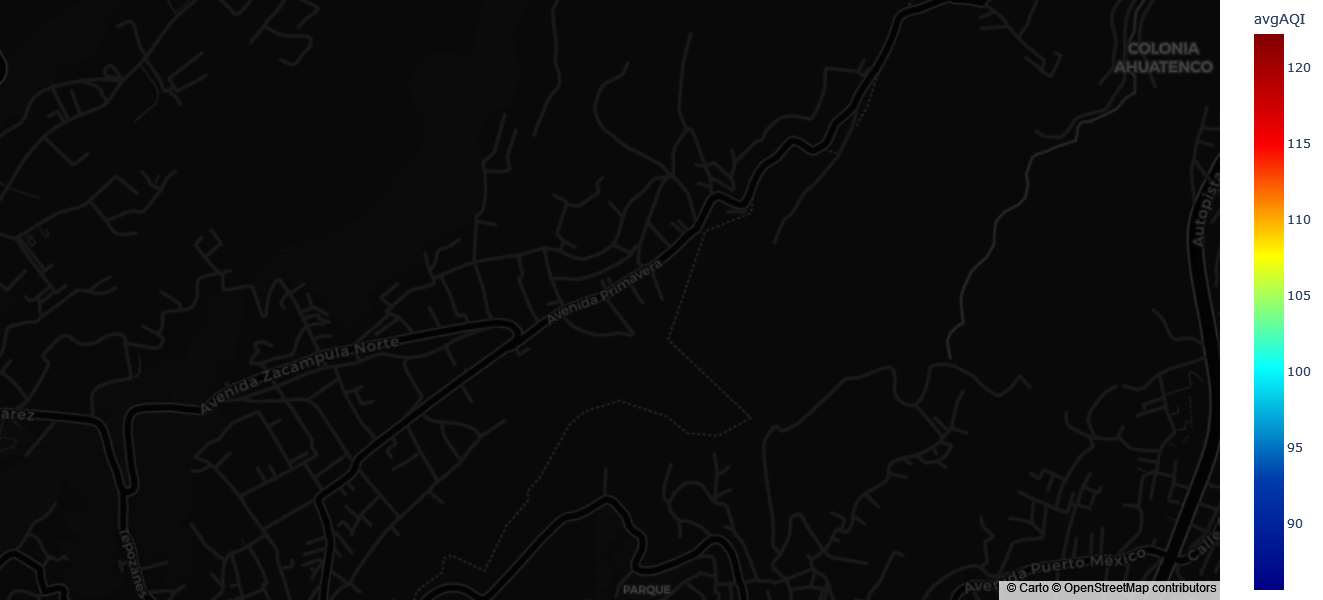

In [49]:
import pandas as pd
#us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
#df_aire = pd.read_csv("../CSV_limpios/aire.csv")

import plotly.express as px

fig = px.scatter_mapbox(df_aire_4, lat="Lat", lon="Lon", hover_name="Alcaldia", hover_data=["avgAQI", "sumCrimes"], size="sumCrimes", size_max=50, color="avgAQI",
                        color_continuous_scale = px.colors.sequential.Jet, zoom=10, height=600)
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#us_cities


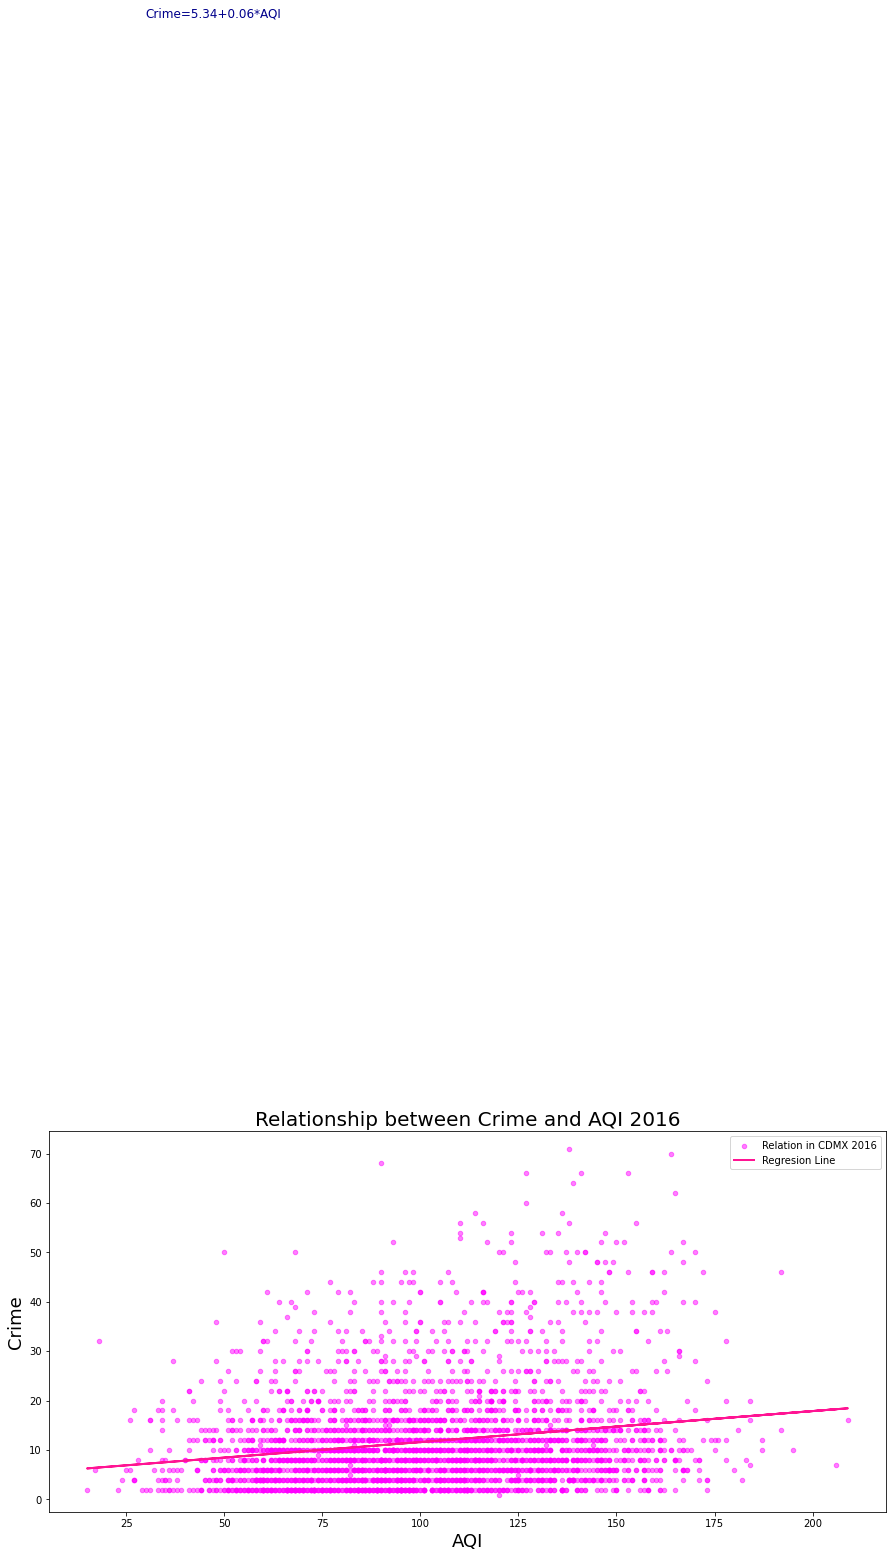

In [13]:
df_all_2016 = df_all[df_all['Anio'] == 2016]

df_all_2016_fit = np.polyfit(df_all_2016.AQI, df_all_2016.Crimenes, 1)

df_all_2016.plot(kind='scatter', x='AQI', y='Crimenes', color='magenta', alpha=0.5, figsize=(15, 7))

plt.plot(df_all_2016.AQI, df_all_2016_fit[0] * df_all_2016.AQI + df_all_2016_fit[1], color='deeppink', linewidth=2)

plt.text(30, 300, 'Crime={:.2f}+{:.2f}*AQI'.format(df_all_2016_fit[1], df_all_2016_fit[0]), color='darkblue', size=12)


plt.legend(labels=['Relation in CDMX 2016', 'Regresion Line'])
plt.title('Relationship between Crime and AQI 2016', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

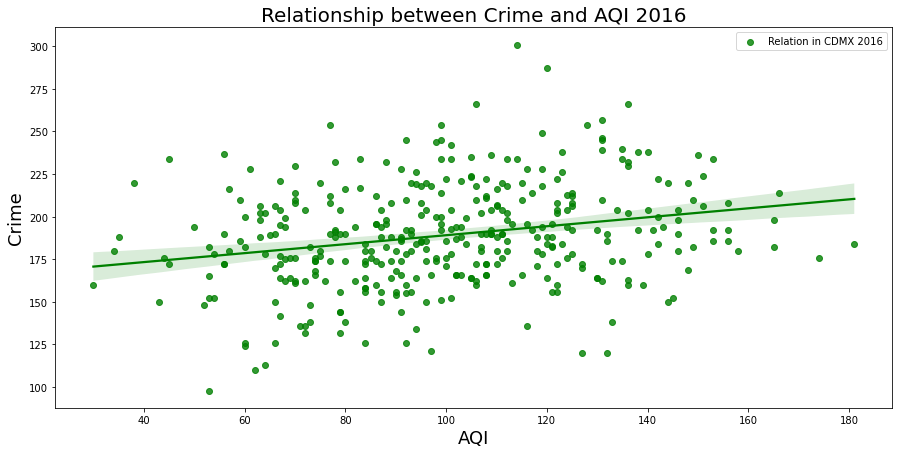

In [9]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(15, 7))
sns.regplot(x=df_all_2016.AQI, y=df_all_2016.Crimenes, color='g')

# Legend, title and labels.
plt.legend(labels=['Relation in CDMX 2016'])
plt.title('Relationship between Crime and AQI 2016', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

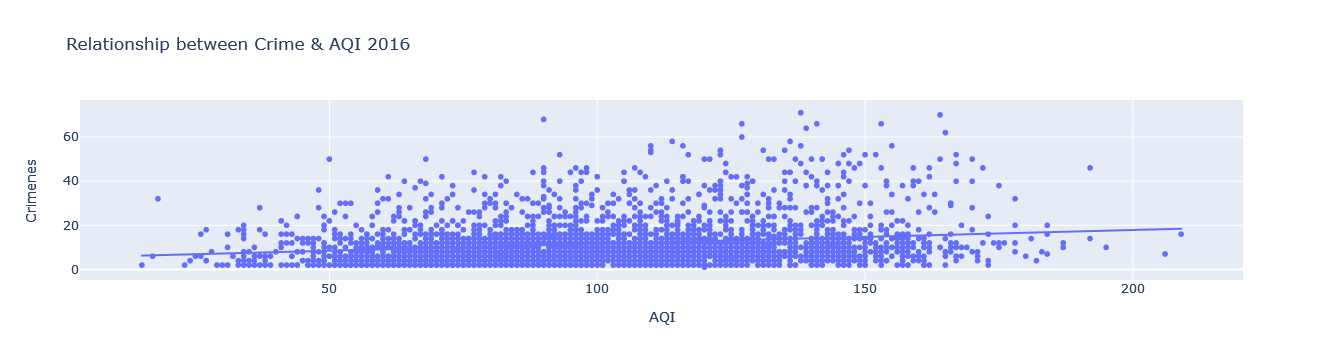

In [12]:
import plotly.express as px
df_all_2016 = df_all[df_all['Anio'] == 2016]
figure = px.scatter(data_frame = df_all_2016, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2016")
figure.show()

#OLS = Ordinary Least Squares

<AxesSubplot:>

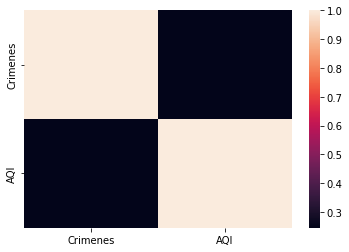

In [18]:

df_new = df_all_2016.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

In [58]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all_2016.AQI, df_all_2016.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
#print('p value: ' + str(p_value))
print("p value: {:f}".format(p_value))

r: 0.245013
p value: 0.000002


In [14]:
df_all

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,7,206
1,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,7,184
2,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,10,164
3,1_1_2016_CUAUH,1,1,2016,CUAUHTEMOC,19.411617,-99.152206,12,178
4,1_1_2016_IZTAC,1,1,2016,IZTACALCO,19.384413,-99.117638,12,187
...,...,...,...,...,...,...,...,...,...
15076,31_12_2020_BENIT,31,12,2020,BENITO JUAREZ,19.370464,-99.159599,2,117
15077,31_12_2020_CUAJI,31,12,2020,CUAJIMALPA DE MORELOS,19.357357,-99.262863,2,97
15078,31_12_2020_GUSTA,31,12,2020,GUSTAVO A MADERO,19.482700,-99.094521,24,128
15079,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.360794,-99.073883,15,127


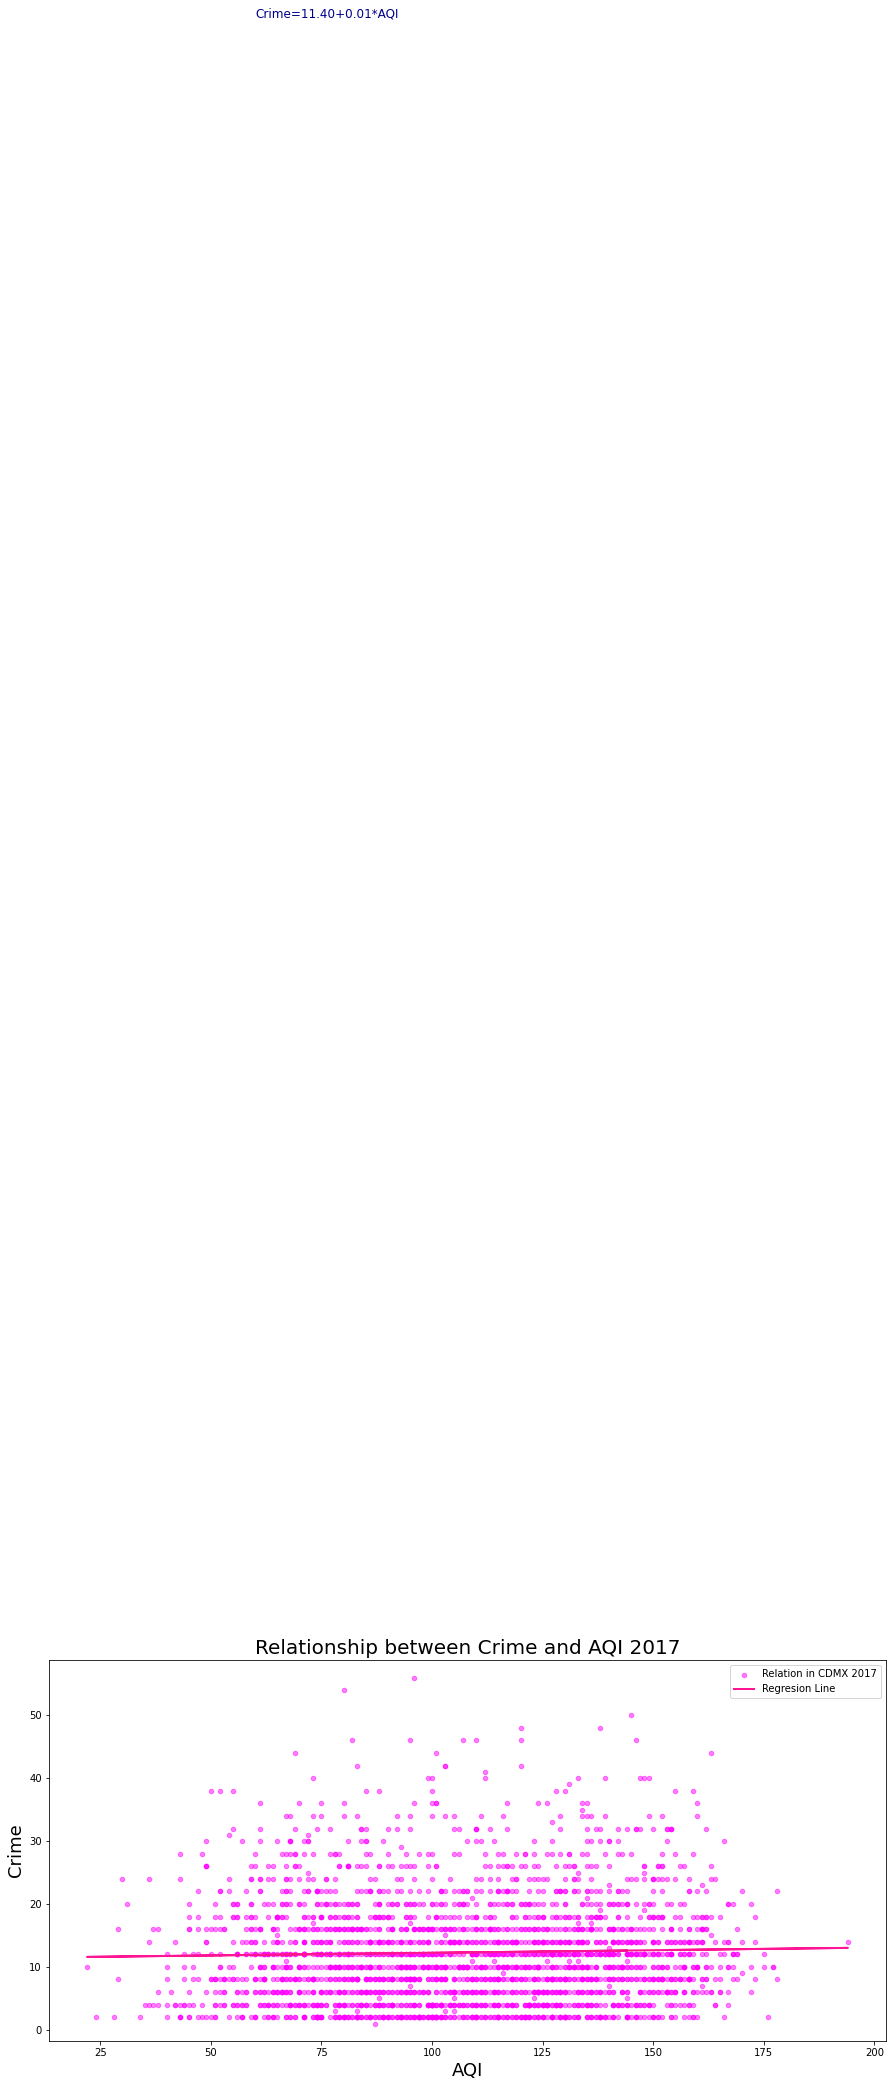

In [15]:
df_all_2017 = df_all[df_all['Anio'] == 2017]

df_all_2017_fit = np.polyfit(df_all_2017.AQI, df_all_2017.Crimenes, 1)

df_all_2017.plot(kind='scatter', x='AQI', y='Crimenes', color='magenta', alpha=0.5, figsize=(15, 7))

plt.plot(df_all_2017.AQI, df_all_2017_fit[0] * df_all_2017.AQI + df_all_2017_fit[1], color='deeppink', linewidth=2)

plt.text(60, 320, 'Crime={:.2f}+{:.2f}*AQI'.format(df_all_2017_fit[1], df_all_2017_fit[0]), color='darkblue', size=12)


plt.legend(labels=['Relation in CDMX 2017', 'Regresion Line'])
plt.title('Relationship between Crime and AQI 2017', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

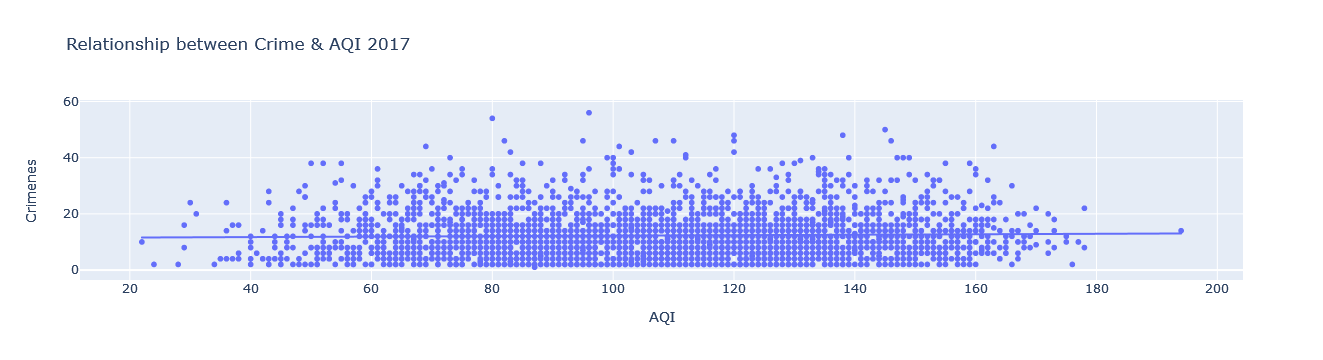

In [16]:
import plotly.express as px
figure = px.scatter(data_frame = df_all_2017, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2017")
figure.show()

In [27]:
df_new = df_all_2017.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

,Crimenes,AQI
Crimenes,1.000000,-0.104704
AQI,-0.104704,1.000000


In [57]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all_2017.AQI, df_all_2017.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
#print('p value: ' + str(p_value))
print("p value: {:f}".format(p_value))

r: -0.104704
p value: 0.045608


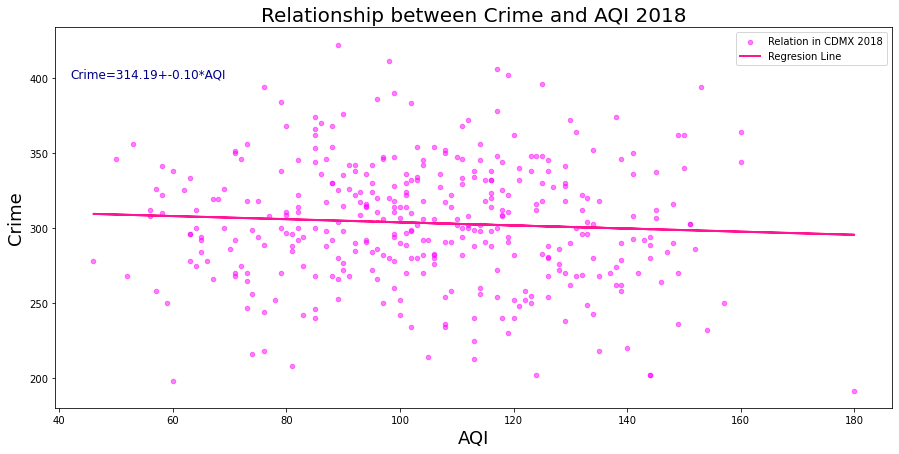

In [31]:
df_all_2018 = df_all[df_all['Anio'] == 2018]

df_all_2018_fit = np.polyfit(df_all_2018.AQI, df_all_2018.Crimenes, 1)

df_all_2018.plot(kind='scatter', x='AQI', y='Crimenes', color='magenta', alpha=0.5, figsize=(15, 7))

plt.plot(df_all_2018.AQI, df_all_2018_fit[0] * df_all_2018.AQI + df_all_2018_fit[1], color='deeppink', linewidth=2)

plt.text(42, 400, 'Crime={:.2f}+{:.2f}*AQI'.format(df_all_2018_fit[1], df_all_2018_fit[0]), color='darkblue', size=12)


plt.legend(labels=['Relation in CDMX 2018', 'Regresion Line'])
plt.title('Relationship between Crime and AQI 2018', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

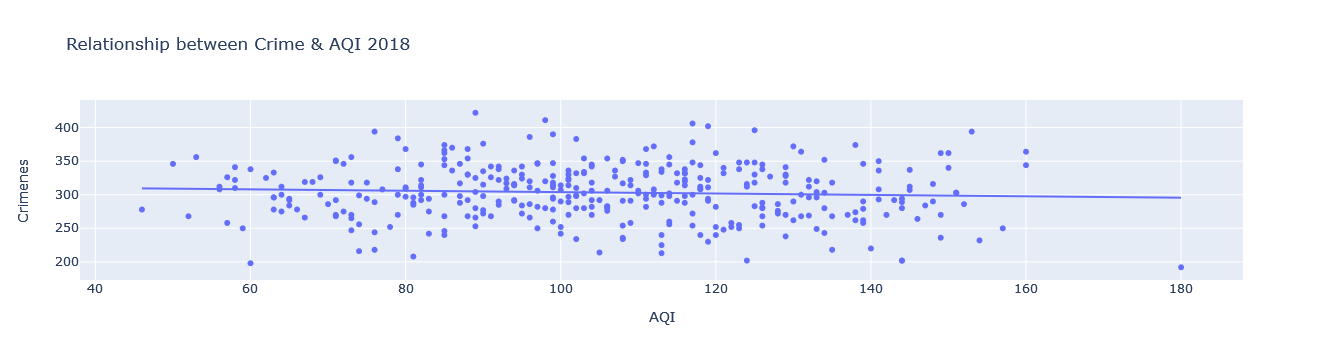

In [32]:
import plotly.express as px
figure = px.scatter(data_frame = df_all_2018, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2018")
figure.show()

In [33]:
df_new = df_all_2018.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

,Crimenes,AQI
Crimenes,1.000000,-0.063249
AQI,-0.063249,1.000000


In [56]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all_2018.AQI, df_all_2018.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
#print('p value: ' + str(p_value))
print("p value: {:f}".format(p_value))

r: -0.063249
p value: 0.228034


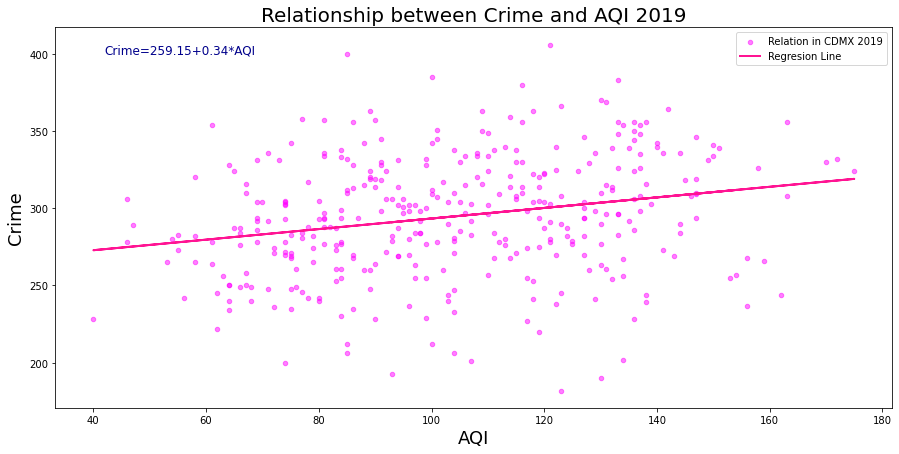

In [34]:
df_all_2019 = df_all[df_all['Anio'] == 2019]

df_all_2019_fit = np.polyfit(df_all_2019.AQI, df_all_2019.Crimenes, 1)

df_all_2019.plot(kind='scatter', x='AQI', y='Crimenes', color='magenta', alpha=0.5, figsize=(15, 7))

plt.plot(df_all_2019.AQI, df_all_2019_fit[0] * df_all_2019.AQI + df_all_2019_fit[1], color='deeppink', linewidth=2)

plt.text(42, 400, 'Crime={:.2f}+{:.2f}*AQI'.format(df_all_2019_fit[1], df_all_2019_fit[0]), color='darkblue', size=12)


plt.legend(labels=['Relation in CDMX 2019', 'Regresion Line'])
plt.title('Relationship between Crime and AQI 2019', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

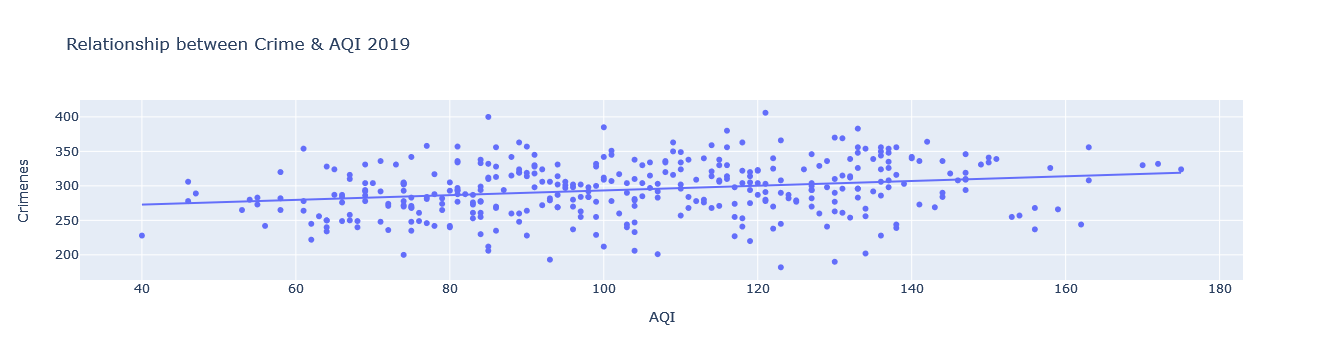

In [35]:
import plotly.express as px
figure = px.scatter(data_frame = df_all_2019, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2019")
figure.show()

In [46]:
df_new = df_all_2019.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

,Crimenes,AQI
Crimenes,1.000000,0.238405
AQI,0.238405,1.000000


In [50]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all_2019.AQI, df_all_2019.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
#print('p value: ' + str(p_value))
print("p value: {:f}".format(p_value))

r: 0.238405
p value: 0.000004


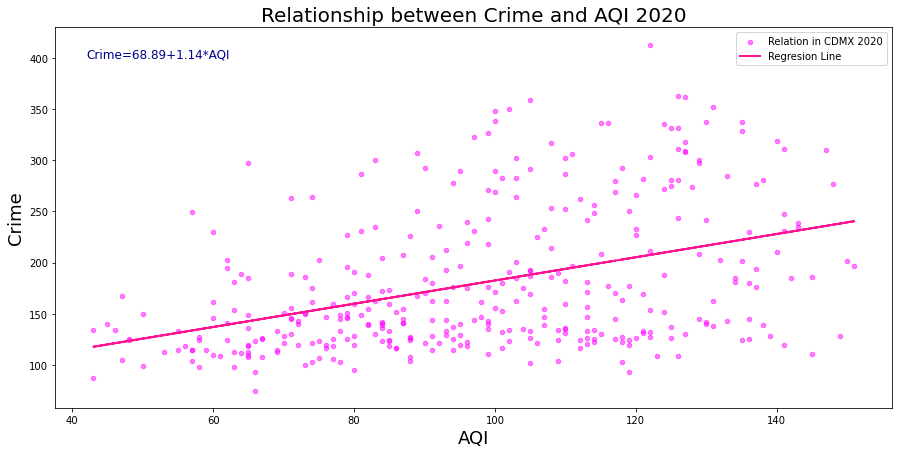

In [37]:
df_all_2020 = df_all[df_all['Anio'] == 2020]

df_all_2020_fit = np.polyfit(df_all_2020.AQI, df_all_2020.Crimenes, 1)

df_all_2020.plot(kind='scatter', x='AQI', y='Crimenes', color='magenta', alpha=0.5, figsize=(15, 7))

plt.plot(df_all_2020.AQI, df_all_2020_fit[0] * df_all_2020.AQI + df_all_2020_fit[1], color='deeppink', linewidth=2)

plt.text(42, 400, 'Crime={:.2f}+{:.2f}*AQI'.format(df_all_2020_fit[1], df_all_2020_fit[0]), color='darkblue', size=12)


plt.legend(labels=['Relation in CDMX 2020', 'Regresion Line'])
plt.title('Relationship between Crime and AQI 2020', size=20)
plt.xlabel('AQI', size=18)
plt.ylabel('Crime', size=18);

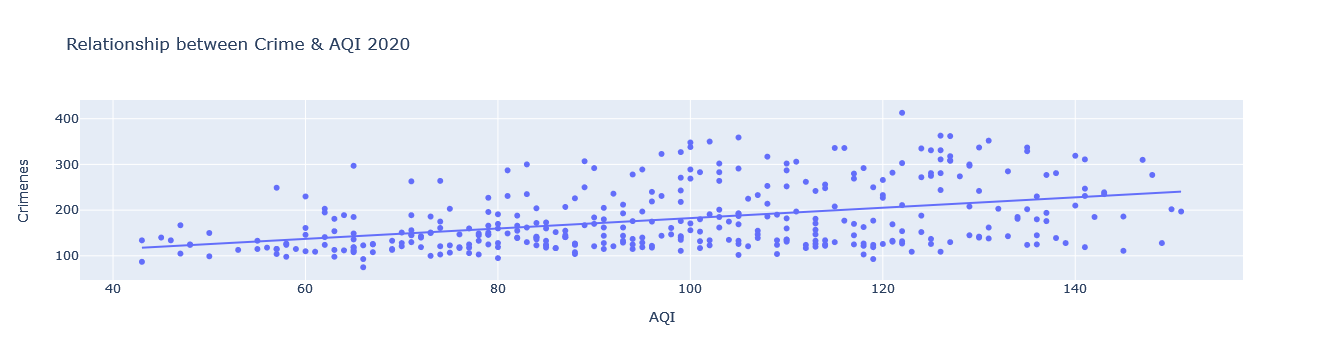

In [38]:
import plotly.express as px
figure = px.scatter(data_frame = df_all_2020, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2020")
figure.show()

In [49]:
df_new = df_all_2020.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

,Crimenes,AQI
Crimenes,1.000000,0.412139
AQI,0.412139,1.000000


In [55]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all_2020.AQI, df_all_2020.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
print('p value: ' + str(p_value))
print("p value: {:.16f}".format(p_value))

r: 0.412139
p value: 1.9325818752479238e-16
p value: 0.0000000000000002


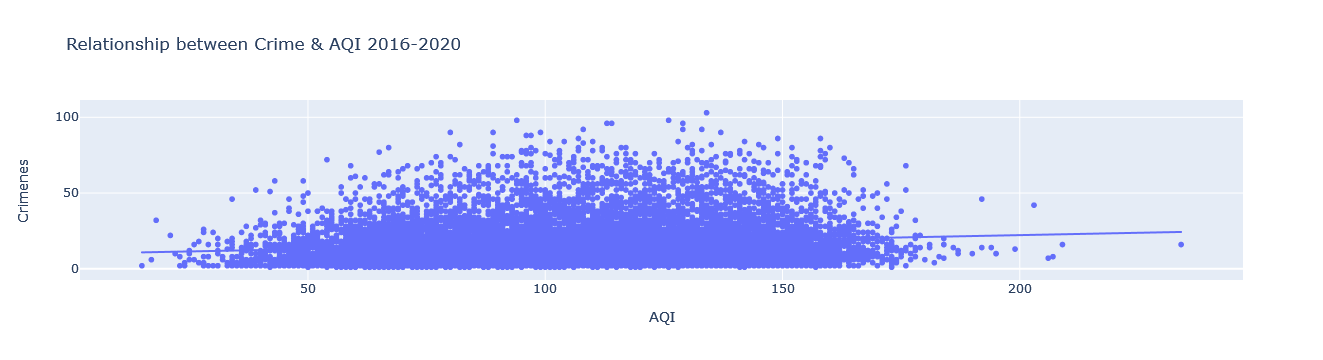

In [ ]:
import plotly.express as px
figure = px.scatter(data_frame = df_all, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI 2016-2020")
figure.show()

In [60]:
df_new = df_all.iloc[:, 3:]
#sns.heatmap(df_new.corr())
df_new.corr()

,Crimenes,AQI
Crimenes,1.000000,0.177424
AQI,0.177424,1.000000


In [61]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_all.AQI, df_all.Crimenes)

print("r: {:f}".format(pearson_coef))
#r = (Pearson correlation coefficient)
print('p value: ' + str(p_value))
print("p value: {:.16f}".format(p_value))

r: 0.177424
p value: 2.1860239381170596e-14
p value: 0.0000000000000219
